In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
file_path='/content/drive/MyDrive/combined_filtered_data_with_rul (1).csv'
data=pd.read_csv(file_path, delimiter=';', encoding='utf-8', on_bad_lines='skip')
print("File loaded successfully!")

File loaded successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.columns

Index(['time_stamp', 'asset_id', 'status_type_id', 'sensor_0_avg',
       'sensor_1_avg', 'sensor_2_avg', 'wind_speed_3_avg', 'wind_speed_4_avg',
       'wind_speed_3_max', 'wind_speed_3_min', 'wind_speed_3_std',
       'sensor_5_avg', 'sensor_5_max', 'sensor_5_min', 'sensor_5_std',
       'sensor_6_avg', 'sensor_7_avg', 'sensor_8_avg', 'sensor_9_avg',
       'sensor_10_avg', 'sensor_11_avg', 'sensor_12_avg', 'sensor_13_avg',
       'sensor_14_avg', 'sensor_15_avg', 'sensor_16_avg', 'sensor_17_avg',
       'sensor_18_avg', 'sensor_18_max', 'sensor_18_min', 'sensor_18_std',
       'sensor_19_avg', 'sensor_20_avg', 'sensor_21_avg', 'sensor_22_avg',
       'sensor_23_avg', 'sensor_24_avg', 'sensor_25_avg', 'sensor_26_avg',
       'reactive_power_27_avg', 'reactive_power_27_max',
       'reactive_power_27_min', 'reactive_power_27_std',
       'reactive_power_28_avg', 'reactive_power_28_max',
       'reactive_power_28_min', 'reactive_power_28_std', 'power_29_avg',
       'power_29_max', 'po

In [ ]:
#Renaming the columns
rename_mapping = {
    'time_stamp': 'time_stamp',
    'asset_id': 'asset_id',
    'id': 'id',
    'train_test': 'train_test',
    'status_type_id': 'status_type_id',
    'sensor_0_avg': 'Ambient temperature avg',
    'sensor_1_avg': 'Wind absolute direction avg',
    'sensor_2_avg': 'Wind relative direction avg',
    'wind_speed_3_avg': 'Windspeed avg',
    'wind_speed_4_avg': 'Estimated windspeed avg',
    'wind_speed_3_max': 'Windspeed max',
    'wind_speed_3_min': 'Windspeed min',
    'wind_speed_3_std': 'Windspeed std',
    'sensor_5_avg': 'Pitch angle avg',
    'sensor_5_max': 'Pitch angle max',
    'sensor_5_min': 'Pitch angle min',
    'sensor_5_std': 'Pitch angle std',
    'sensor_6_avg': 'Hub controller temperature avg',
    'sensor_7_avg': 'Top nacelle controller temperature avg',
    'sensor_8_avg': 'Choke coils on the VCS- section temperature avg',
    'sensor_9_avg': 'VCP-board temperature avg',
    'sensor_10_avg': 'VCS cooling water temperature avg',
    'sensor_11_avg': 'Gearbox bearing on high speed shaft  temperature avg',
    'sensor_12_avg': 'Gearbox oil temperature avg',
    'sensor_13_avg': 'Generator bearing 2(Drive end)  temperature avg',
    'sensor_14_avg': 'Generator bearing 1(Non-drive end) temperature avg',
    'sensor_15_avg': 'Generator stator winding phase 1 temperature avg',
    'sensor_16_avg': 'Generator stator winding phase 2 temperature avg',
    'sensor_17_avg': 'Generator stator winding phase 3 temperature avg',
    'sensor_18_avg': 'Generator rpm avg',
    'sensor_18_max': 'Generator rpm max',
    'sensor_18_min': 'Generator rpm min',
    'sensor_18_std': 'Generator rpm std',
    'sensor_19_avg': 'Split ring chamber temperature avg',
    'sensor_20_avg': 'Busbar section temperature avg',
    'sensor_21_avg': 'IGBT-driver on grid side inverter temperature avg',
    'sensor_22_avg': 'Actual Phase displacement avg',
    'sensor_23_avg': 'Averaged current phase 1',
    'sensor_24_avg': 'Averaged current phase 2',
    'sensor_25_avg': 'Averaged current phase 3',
    'sensor_26_avg': 'Grid frequency',
    'reactive_power_27_avg': 'Possible Grid capacitive reactive power avg',
    'reactive_power_27_max': 'Possible Grid capacitive reactive power max',
    'reactive_power_27_min': 'Possible Grid capacitive reactive power min',
    'reactive_power_27_std': 'Possible Grid capacitive reactive power std',
    'reactive_power_28_avg': 'Possible Grid inductive reactive power avg',
    'reactive_power_28_max': 'Possible Grid inductive reactive power max',
    'reactive_power_28_min': 'Possible Grid inductive reactive power min',
    'reactive_power_28_std': 'Possible Grid inductive reactive power std',
    'power_29_avg': 'Possible Grid active power avg',
    'power_29_max': 'Possible Grid active power max',
    'power_29_min': 'Possible Grid active power min',
    'power_29_std': 'Possible Grid active power std',
    'power_30_avg': 'Grid power avg',
    'power_30_max': 'Grid power max',
    'power_30_min': 'Grid power min',
    'power_30_std': 'Grid power std',
    'sensor_31_avg': 'Grid reactive power avg',
    'sensor_31_max': 'Grid reactive power max',
    'sensor_31_min': 'Grid reactive power min',
    'sensor_31_std': 'Grid reactive power std',
    'sensor_32_avg': 'Averaged voltage phase 1',
    'sensor_33_avg': 'Averaged voltage phase 2',
    'sensor_34_avg': 'Averaged voltage phase 3',
    'sensor_35_avg': 'IGBT-driver on rotor side inverter phase 1 temperature avg',
    'sensor_36_avg': 'IGBT-driver on rotor side inverter phase 2 temperature avg',
    'sensor_37_avg': 'IGBT-driver on rotor side inverter phase 3 temperature avg',
    'sensor_38_avg': 'HV transformer phase L1 temperature avg',
    'sensor_39_avg': 'HV transformer phase L2 temperature avg',
    'sensor_40_avg': 'HV transformer phase L3 temperature avg',
    'sensor_41_avg': 'Hydraulic group oil temperature avg',
    'sensor_42_avg': 'Nacelle direction avg',
    'sensor_43_avg': 'Nacelle temperature avg',
    'sensor_44': 'Generator disconnected active power avg',
    'sensor_45': 'Generator connected in delta active power avg',
    'sensor_46': 'Generator connected in star active power avg',
    'sensor_47': 'Generator disconnected reactive power avg',
    'sensor_48': 'Generator connected in delta reactive power avg',
    'sensor_49': 'Generator connected in star reactive power avg',
    'sensor_50': 'Total active power avg',
    'sensor_51': 'Total reactive power avg',
    'sensor_52_avg': 'Rotor rpm avg',
    'sensor_52_max': 'Rotor rpm max',
    'sensor_52_min': 'Rotor rpm min',
    'sensor_52_std': 'Rotor rpm std',
    'sensor_53_avg': 'Nose cone temperature avg',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_mapping, inplace=True)
# Convert time to python date time format
data['time_stamp']=pd.to_datetime(data['time_stamp'])
#Converting object dtypes to strings
data=data.astype({col: 'string' for col in data.select_dtypes(include='object').columns})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38257 entries, 0 to 38256
Data columns (total 86 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   time_stamp                                                  38257 non-null  datetime64[ns]
 1   asset_id                                                    38257 non-null  int64         
 2   status_type_id                                              38257 non-null  int64         
 3   Ambient temperature avg                                     38257 non-null  float64       
 4   Wind absolute direction avg                                 38257 non-null  float64       
 5   Wind relative direction avg                                 38257 non-null  float64       
 6   Windspeed avg                                               38257 non-null  float64       
 7   Estimated windspeed av

In [ ]:
input_data = data.drop(['time_stamp'], axis=1)

In [ ]:
#Handling missing values
input_data=input_data.dropna()
data=data.dropna()
missing_data=data.isnull().sum()
missing_values=input_data.isnull().sum()
print("Missing values: \n", missing_data[missing_data>0])
print("Missing values: \n", missing_values[missing_values>0])

Missing values: 
 Series([], dtype: int64)
Missing values: 
 Series([], dtype: int64)


In [ ]:
input_data['event_description'] = input_data['event_description'].str.strip().map({
    'Normal': 0,
    'Generator bearing failure': 1,
    'Hydraulic group': 2,
    'Transformer failure': 3,
    'Gearbox failure': 4
})

In [ ]:
print(input_data['event_description'].unique())

[1 4 0 2 3]


Epoch 1/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 7833353.0000 - mae: 2380.7263
Epoch 2/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 1608421.0000 - mae: 1023.8169
Epoch 3/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 1104806.5000 - mae: 735.1430
Epoch 4/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - loss: 948122.0625 - mae: 663.8458
Epoch 5/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 822564.0625 - mae: 606.8809
Epoch 6/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 740896.3125 - mae: 567.7366
Epoch 7/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 667080.0000 - mae: 532.8807
Epoch 8/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 627936.1875 - mae: 517.2318
Epoch 9/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 573070.2500 - mae: 490.7053
Epoch 10/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 517500.8750 - mae: 463.3528
Epoch 11/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 507914.9375 - mae: 454.8243
Epo

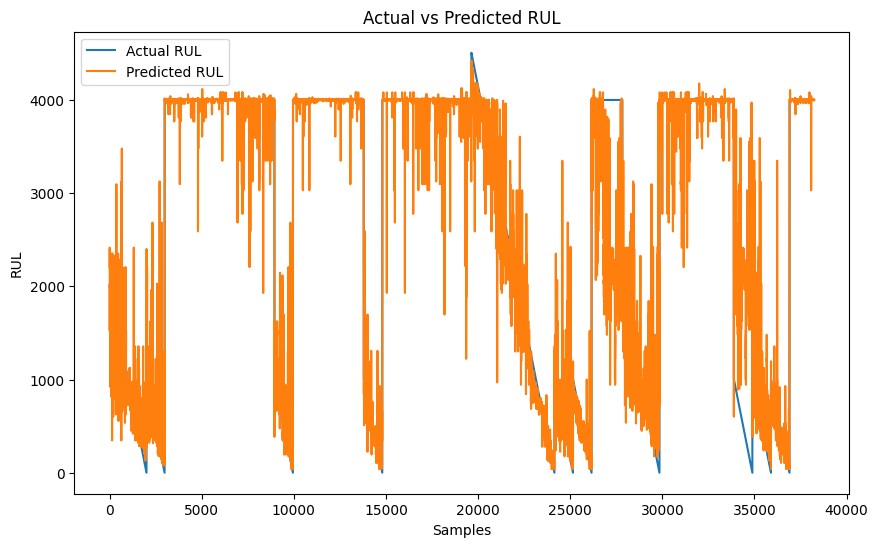

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping

def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(target[i + time_steps - 1])
    return np.array(X), np.array(y)

features = ['status_type_id', 'Generator rpm avg', 'Generator rpm max', 'Ambient temperature avg',
    'Split ring chamber temperature avg', 'Pitch angle avg',
    'IGBT-driver on grid side inverter temperature avg', 'Pitch angle min',
    'Generator stator winding phase 2 temperature avg', 'Windspeed std',
    'Generator bearing 1(Non-drive end) temperature avg', 'Busbar section temperature avg',
    'Actual Phase displacement avg', 'Hub controller temperature avg', 'VCP-board temperature avg',
    'Total active power avg', 'Averaged current phase 2', 'Windspeed avg',
    'Averaged current phase 3', 'Top nacelle controller temperature avg',
    'Estimated windspeed avg', 'Gearbox oil temperature avg',
    'Generator stator winding phase 1 temperature avg', 'Generator bearing 2(Drive end)  temperature avg',
    'Choke coils on the VCS- section temperature avg', 'Pitch angle max',
    'Possible Grid capacitive reactive power avg', 'Averaged current phase 1',
    'Windspeed min', 'VCS cooling water temperature avg']

X = input_data[features].values
y = input_data['RUL'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = y_seq.reshape(-1, 1)

cnn_lstm_model = Sequential([
    layers.Input(shape=(time_steps, X_seq.shape[2])),

    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=False),

    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
])

cnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
cnn_lstm_model.fit(X_seq, y_seq, epochs=25, batch_size=64, callbacks=[early_stopping], verbose=1)

X_cnn_lstm_features = cnn_lstm_model.predict(X_seq)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', n_estimators=300)
xgb_model.fit(X_cnn_lstm_features, y_seq)

y_pred = xgb_model.predict(X_cnn_lstm_features)

mae = mean_absolute_error(y_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_seq, y_pred))
r2 = r2_score(y_seq, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_seq, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()

In [ ]:
from keras.models import Sequential
from keras import layers
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Data Preprocessing
X = input_data[features].values
y = input_data['RUL'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = y_seq.reshape(-1, 1)

# CNN + GRU Model
cnn_gru_model = Sequential([
    layers.Input(shape=(time_steps, X_seq.shape[2])),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.GRU(128, return_sequences=True),
    layers.GRU(64, return_sequences=False),

    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
])

cnn_gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early Stopping
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
cnn_gru_model.fit(X_seq, y_seq, epochs=25, batch_size=64, callbacks=[early_stopping], verbose=1)

# Extract features from CNN+GRU model
X_cnn_gru_features = cnn_gru_model.predict(X_seq)

# Train XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', n_estimators=300)
xgb_model.fit(X_cnn_gru_features, y_seq)

# Predictions
y_pred = xgb_model.predict(X_cnn_gru_features)

# Evaluation
mae = mean_absolute_error(y_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_seq, y_pred))
r2 = r2_score(y_seq, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Plotting
plt.figure(figsize=(10, 6))



Epoch 1/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 7876330.0000 - mae: 2389.4712
Epoch 2/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 2714218.2500 - mae: 1531.6306
Epoch 3/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 1894091.0000 - mae: 1131.5247
Epoch 4/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 1049586.5000 - mae: 708.9191
Epoch 5/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - loss: 959938.1250 - mae: 670.5027
Epoch 6/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 807881.5000 - mae: 603.4578
Epoch 7/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 715855.3125 - mae: 561.4943
Epoch 8/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 679508.4375 - mae: 540.4042
Epoch 9/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 591708.6250 - mae: 497.0440
Epoch 10/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 580880.1250 - mae: 488.5659
Epoch 11/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 543873.4375 - mae: 478.2147
E

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Epoch 1/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - loss: 8003526.5000 - mae: 2409.9370
Epoch 2/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 2949367.5000 - mae: 1570.1886
Epoch 3/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 1853742.3750 - mae: 1014.5750
Epoch 4/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - loss: 1126157.6250 - mae: 725.4393
Epoch 5/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 840726.7500 - mae: 615.4302
Epoch 6/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 722712.7500 - mae: 558.5956
Epoch 7/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 627313.4375 - mae: 514.8210
Epoch 8/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 575092.8125 - mae: 484.2315
Epoch 9/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 535988.5000 - mae: 465.1898
Epoch 10/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 483679.7500 - mae: 437.9606
Epoch 11/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 482861.8125 - mae: 436.4575
E

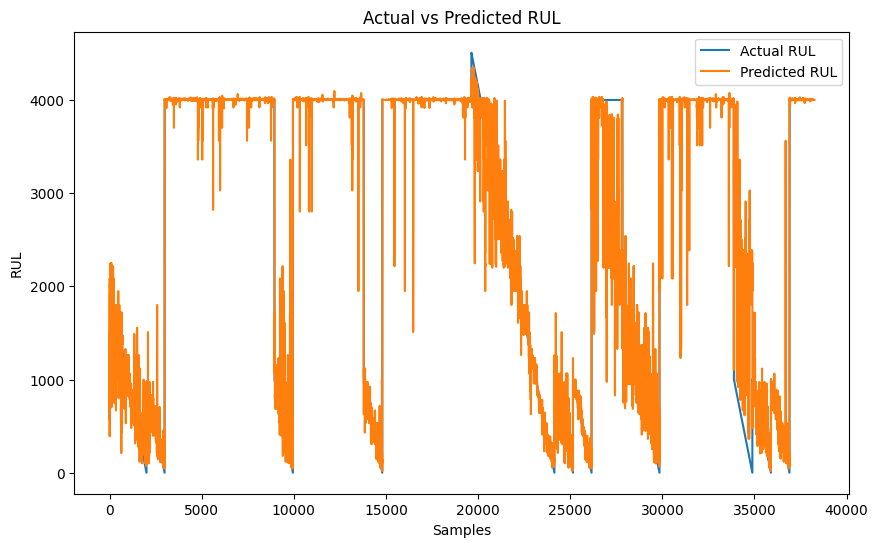

In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras import layers
from keras.callbacks import EarlyStopping

def create_sequences(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, :])
        y.append(target[i + time_steps - 1])
    return np.array(X), np.array(y)

features = ['status_type_id', 'Generator rpm avg', 'Generator rpm max', 'Ambient temperature avg',
    'Split ring chamber temperature avg', 'Pitch angle avg',
    'IGBT-driver on grid side inverter temperature avg', 'Pitch angle min',
    'Generator stator winding phase 2 temperature avg', 'Windspeed std',
    'Generator bearing 1(Non-drive end) temperature avg', 'Busbar section temperature avg',
    'Actual Phase displacement avg', 'Hub controller temperature avg', 'VCP-board temperature avg',
    'Total active power avg', 'Averaged current phase 2', 'Windspeed avg',
    'Averaged current phase 3', 'Top nacelle controller temperature avg',
    'Estimated windspeed avg', 'Gearbox oil temperature avg',
    'Generator stator winding phase 1 temperature avg', 'Generator bearing 2(Drive end)  temperature avg',
    'Choke coils on the VCS- section temperature avg', 'Pitch angle max',
    'Possible Grid capacitive reactive power avg', 'Averaged current phase 1',
    'Windspeed min', 'VCS cooling water temperature avg']

X = input_data[features].values
y = input_data['RUL'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y, time_steps)
y_seq = y_seq.reshape(-1, 1)

# CNN + LSTM + GRU Model
cnn_lstm_gru_model = Sequential([
    layers.Input(shape=(time_steps, X_seq.shape[2])),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=True),

    layers.GRU(64, return_sequences=False),

    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
])

cnn_lstm_gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
cnn_lstm_gru_model.fit(X_seq, y_seq, epochs=25, batch_size=64, callbacks=[early_stopping], verbose=1)

# Extract features from CNN-LSTM-GRU model for XGBoost
X_cnn_lstm_gru_features = cnn_lstm_gru_model.predict(X_seq)

# Train XGBoost model on features extracted from CNN-LSTM-GRU
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', n_estimators=300)
xgb_model.fit(X_cnn_lstm_gru_features, y_seq)

# Predict and evaluate the model
y_pred = xgb_model.predict(X_cnn_lstm_gru_features)

mae = mean_absolute_error(y_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_seq, y_pred))
r2 = r2_score(y_seq, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_seq, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


Epoch 1/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - loss: 8027291.0000 - mae: 2413.1963
Epoch 2/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 2960767.2500 - mae: 1575.2418
Epoch 3/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 1893332.7500 - mae: 1050.4327
Epoch 4/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 1133800.0000 - mae: 750.1899
Epoch 5/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 955119.5625 - mae: 674.2907
Epoch 6/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 872224.1875 - mae: 636.7856
Epoch 7/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 801957.6250 - mae: 597.0382
Epoch 8/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 741239.7500 - mae: 572.1268
Epoch 9/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 711412.6250 - mae: 557.5198
Epoch 10/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 664291.3750 - mae: 532.3898
Epoch 11/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 617974.6250 - mae: 510.0124
Epoch 12

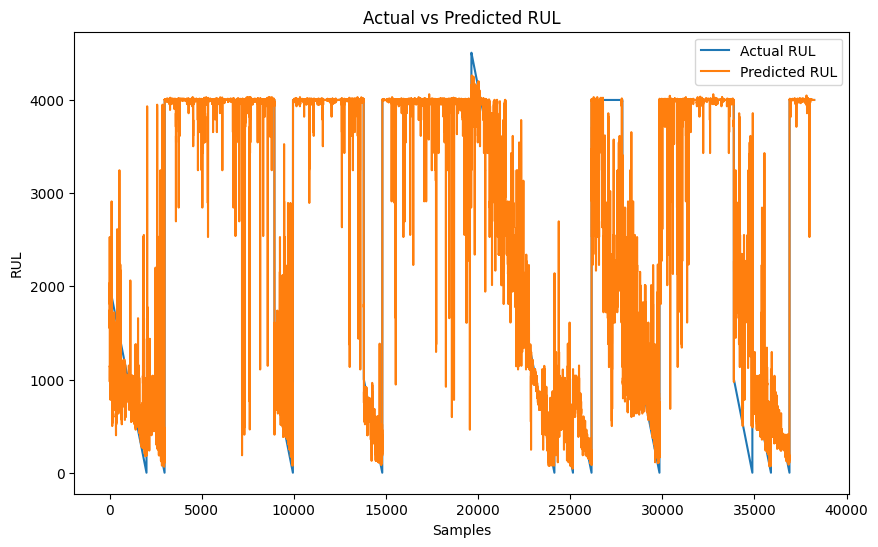

In [18]:
# CNN + RNN + GRU Model
cnn_rnn_gru_model = Sequential([
    layers.Input(shape=(time_steps, X_seq.shape[2])),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.SimpleRNN(128, return_sequences=True),
    layers.GRU(64, return_sequences=False),

    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
])

cnn_rnn_gru_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

cnn_rnn_gru_model.fit(X_seq, y_seq, epochs=25, batch_size=64, callbacks=[early_stopping], verbose=1)

# Extract features for XGBoost
X_cnn_rnn_gru_features = cnn_rnn_gru_model.predict(X_seq)

# Train XGBoost model
xgb_model.fit(X_cnn_rnn_gru_features, y_seq)

# Predict and evaluate
y_pred = xgb_model.predict(X_cnn_rnn_gru_features)

mae = mean_absolute_error(y_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_seq, y_pred))
r2 = r2_score(y_seq, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_seq, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()


Epoch 1/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - loss: 7959110.0000 - mae: 2399.5029
Epoch 2/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 2129854.2500 - mae: 1176.4495
Epoch 3/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1318440.0000 - mae: 800.5917
Epoch 4/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 1010913.1875 - mae: 695.9003
Epoch 5/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 915332.8750 - mae: 651.3666
Epoch 6/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 818944.6875 - mae: 606.9647
Epoch 7/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 754832.2500 - mae: 577.1185
Epoch 8/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 695407.6875 - mae: 551.9141
Epoch 9/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 643809.8750 - mae: 529.3212
Epoch 10/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 586476.7500 - mae: 502.3697
Epoch 11/25
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 575194.3125 - mae: 494.6640
Epoch 12/

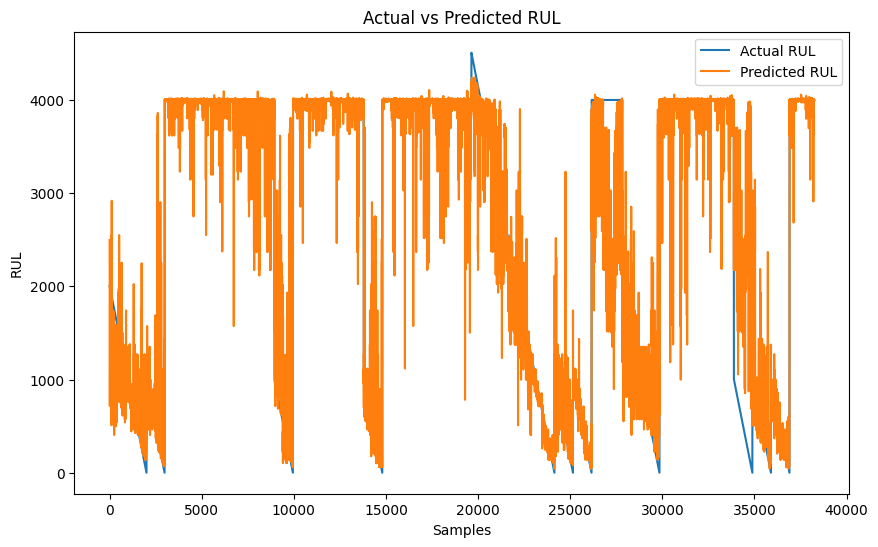

In [19]:
# CNN + RNN + LSTM Model
cnn_rnn_lstm_model = Sequential([
    layers.Input(shape=(time_steps, X_seq.shape[2])),

    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.SimpleRNN(128, return_sequences=True),
    layers.LSTM(64, return_sequences=False),

    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
])

cnn_rnn_lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

cnn_rnn_lstm_model.fit(X_seq, y_seq, epochs=25, batch_size=64, callbacks=[early_stopping], verbose=1)

# Extract features for XGBoost
X_cnn_rnn_lstm_features = cnn_rnn_lstm_model.predict(X_seq)

# Train XGBoost model
xgb_model.fit(X_cnn_rnn_lstm_features, y_seq)

# Predict and evaluate
y_pred = xgb_model.predict(X_cnn_rnn_lstm_features)

mae = mean_absolute_error(y_seq, y_pred)
rmse = np.sqrt(mean_squared_error(y_seq, y_pred))
r2 = r2_score(y_seq, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

plt.figure(figsize=(10, 6))
plt.plot(y_seq, label='Actual RUL')
plt.plot(y_pred, label='Predicted RUL')
plt.title('Actual vs Predicted RUL')
plt.xlabel('Samples')
plt.ylabel('RUL')
plt.legend()
plt.show()
